# Section 1.2 Introduction to Model Fitting

In [1]:
import pymc3 as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

In [2]:
az.style.use('arviz-white')

## Activity 1: Estimate the Proportion of Water

Now it's your turn to work through an example inspired from Richard McElreath's excellent book [Statistical Rethinking](https://www.amazon.com/Statistical-Rethinking-Bayesian-Examples-Chapman/dp/1482253445/)

### How much of a planet is covered in water?

Good news: you're an astronomer that just discovered a new planet. Bad news: your telescope has a small field of view and you can only see one tiny point on the planet at a time. More bad news: you're also a starving grad student and you can only take 5 measurements on your monthly stipend. 

**With 5 measurements what is your estimate for how much of the planet is covered in water?**


You are trying to estimate $\theta$ where
$$\theta = \text{Proportion of water on the planet}$$

Your model is formulated as follows

$$ 
\theta \sim \operatorname{Uniform}(0,1) \\
p_{\text{water}} \sim \operatorname{Binom}(\theta, N)
$$

(Note: the probability density function for $\operatorname{Uniform}(0, 1)$ is the same as for $\operatorname{Beta}(1, 1)$)

### Exercise 1
* What is the prior in this model? What does the prior intuitively mean?

Answer: We have no prior belief about how much or how little water there is on this planet, this we adopt a uniform prior

### Exercise 2
* What is the likelihood in the model? What does the likelihood intuitively mean?

Answer: for each point estimate, assuming that they are gathered at random along the planet's surface, can be thought of as a Bernoulli trial where the chance of spotting water is given by the proportion of water on the planet. Thus we can use a Binomial distribution to describe the likelihood of the summary of observations that were made.

### Exercise 3
Using the data provided below fit your model to estimate the proportion of water on the planet using PyStan or PyMC3. We have provided the PyMC3 model but please feel free to use the PPL you're more comfortable with.

After the fitting the model and plotting the posterior how "certain" are you about the proportion of water on this planet?

In [3]:
# A value of 0 signifies a land observation, a value of 1 signifies a water observation
observations = [0, 0, 1, 0, 1]
water_observations = sum(observations)
total_observations = len(observations)

In [4]:
with pm.Model() as planet_model:
    # Prior
    p_water = pm.Uniform("p_water", 0 ,1)
    
    # Likelihood
    w = pm.Binomial("w", p=p_water, n=total_observations, observed=water_observations)
    
    # Inference Run/ Markov chain Monte Carlo 
    trace_5_obs = pm.sample(5000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [p_water]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:01<00:00, 6202.42draws/s]
The acceptance probability does not match the target. It is 0.8789580360058938, but should be close to 0.8. Try to increase the number of tuning steps.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ce1d060b8>],
      dtype=object)

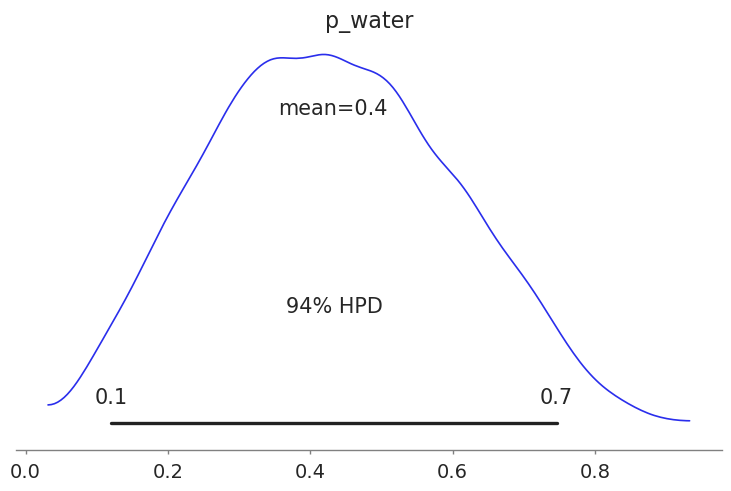

In [5]:
az.plot_posterior(trace_5_obs)

### Exercise 4: Collect more data and get a new posterior
With some extra funding you're now able make 500 observations of this planet.

Using your inution, with more observations will you be more or less certain about the amount of water on a planet?
Do the results match your expectations?

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [p_water]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:01<00:00, 6097.77draws/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7cd98d4710>],
      dtype=object)

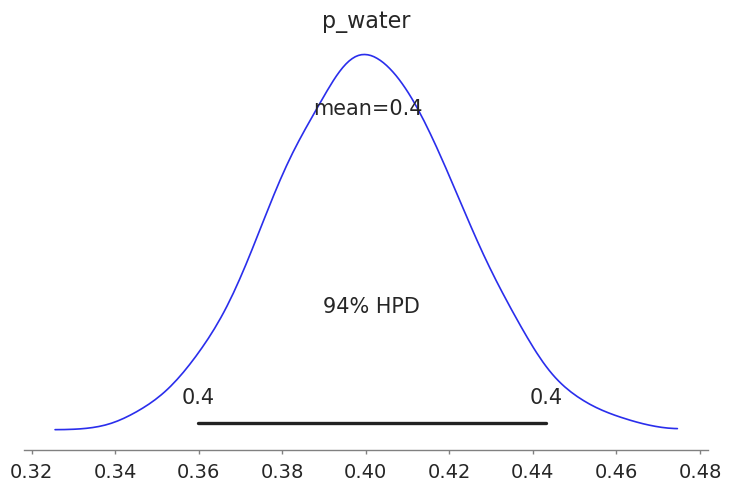

In [6]:
one_hundred_times_the_observations = [0, 0, 1, 0, 1]*100
water_observations = sum(one_hundred_times_the_observations)
total_observations = len(one_hundred_times_the_observations)

with pm.Model() as planet_model_2:
    p_water = pm.Uniform("p_water", 0 ,1)
    w = pm.Binomial("w", p=p_water, n=total_observations, observed=water_observations)
    trace_more_obs = pm.sample(5000, chains=2)
    


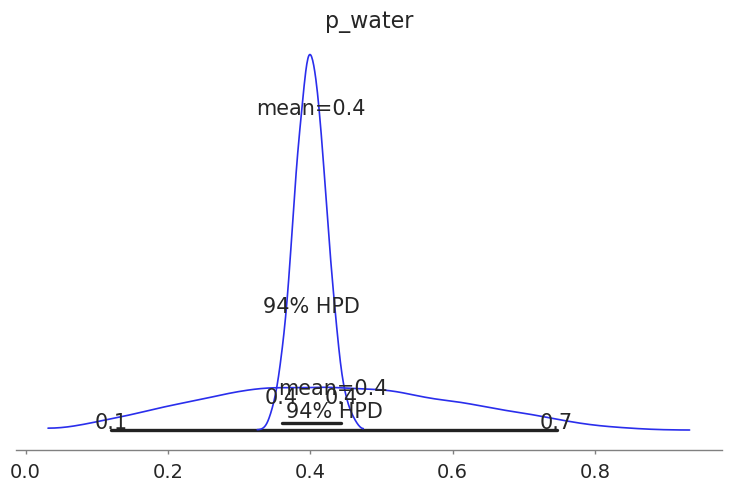

In [9]:
ax = az.plot_posterior(trace_5_obs)
az.plot_posterior(trace_more_obs, ax=ax);

### Exercise 5: A new planet
During your research you encountered a new planet. Unfortunately you once again were only able to take 5 measurements, but in those 5 you only observed land, and no water.

Fit your model and see if the results look any different

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [p_water]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:01<00:00, 6033.91draws/s]
The acceptance probability does not match the target. It is 0.8930559818257171, but should be close to 0.8. Try to increase the number of tuning steps.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7cd9854208>],
      dtype=object)

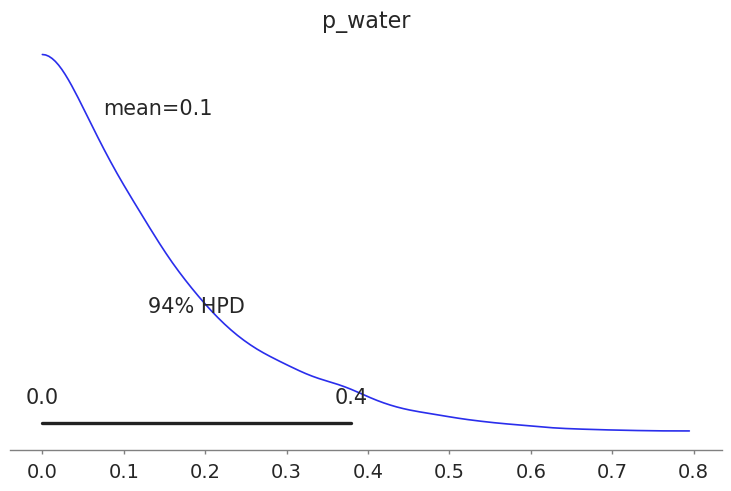

In [10]:
desert_observations = [0, 0, 0, 0, 0]
water_observations = sum(desert_observations)
total_observations = len(desert_observations)

with pm.Model() as planet_model_3:
    p_water = pm.Uniform("p_water", 0 ,1)
    w = pm.Binomial("w", p=p_water, n=total_observations, observed=water_observations)
    trace_new_planet = pm.sample(5000, chains=2)
    
az.plot_posterior(trace_new_planet)

### Exercise 5: Try out a couple ArviZ functions
Convert your inference data to `az.InferenceData` using the methods `az.from_pymc3` or `az.from_stan`. Then try a couple plots such as 

* az.plot_trace
* az.plot_autocorr
* az.plot_forest


Try running a summary function such as 

* az.summary

For now don't worry too much about how to interpret these plots and statistics. This will be covered as we continue in the tutorial.

In [11]:
# Convert PPL data to az.InferenceData
inference_data = az.from_pymc3(trace_5_obs)

In [19]:
inference_data

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [12]:
az.summary(inference_data)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
p_water,0.432,0.172,0.121,0.746,0.003,0.002,3854.0,3854.0,3912.0,5922.0,1.0


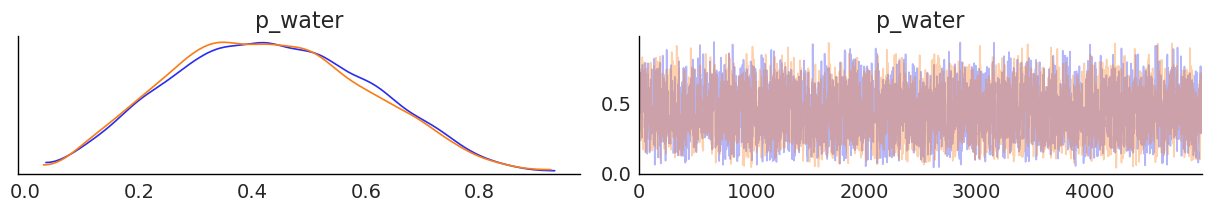

In [16]:
az.plot_trace(inference_data);

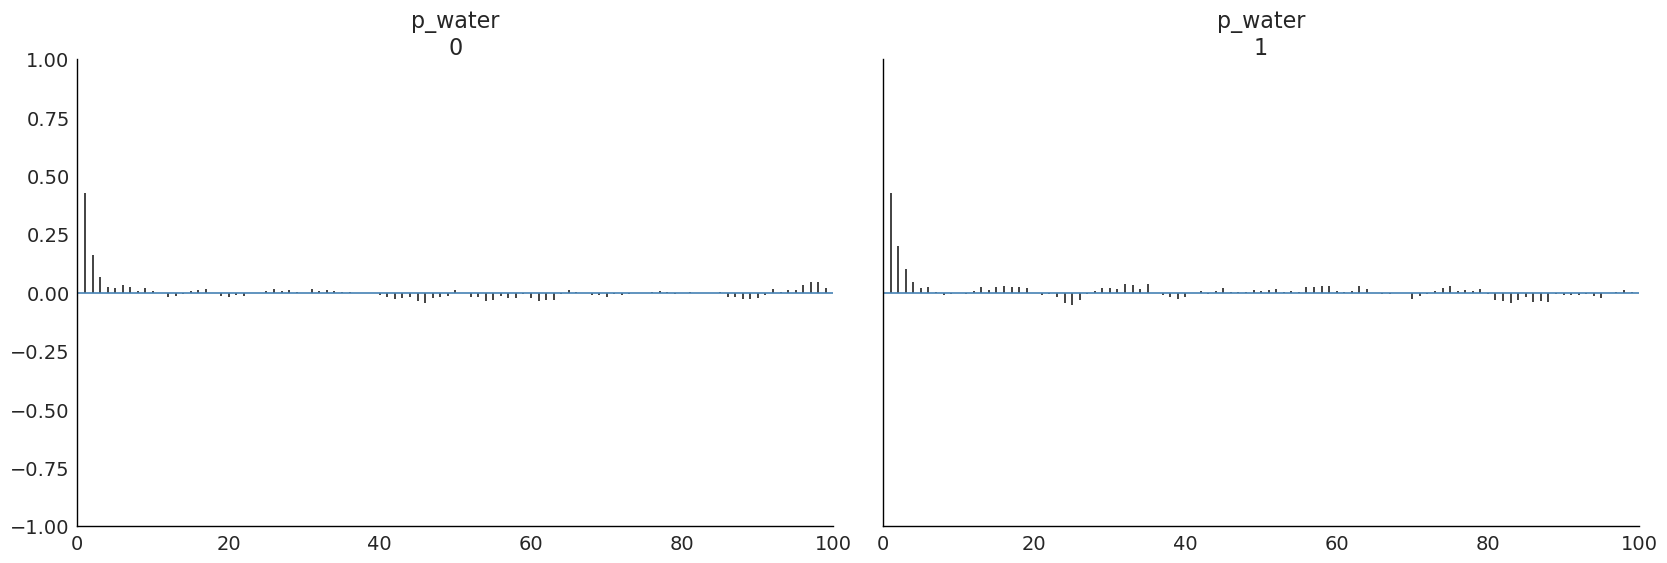

In [17]:
az.plot_autocorr(inference_data);

/home/ry26099/anaconda3/envs/bayesian-modelling-tutorial/lib/python3.7/site-packages/arviz/plots/forestplot.py:207: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  ticks.tick1On = False
/home/ry26099/anaconda3/envs/bayesian-modelling-tutorial/lib/python3.7/site-packages/arviz/plots/forestplot.py:208: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  ticks.tick2On = False


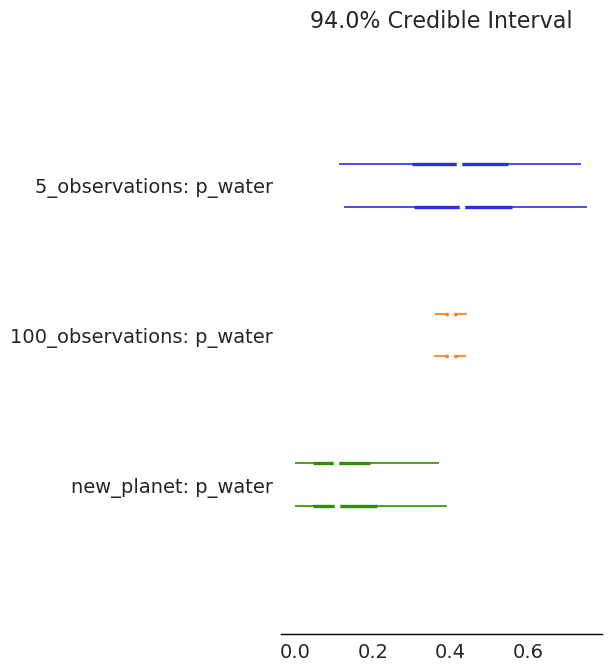

In [18]:
az.plot_forest(
    [trace_5_obs, trace_more_obs, trace_new_planet],
    model_names=["5_observations", "100_observations", "new_planet"],
);

## Bonus:
Explore the ArviZ documentation to see what else is possible.  
https://arviz-devs.github.io/arviz/